<a href="https://colab.research.google.com/github/C3Suryansu/Widhya-Winternship/blob/main/Week_3_Uber_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing and reading files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir uber_data
%cd uber_data
!unzip /content/drive/MyDrive/Uber-dataset.zip

/content/uber_data
Archive:  /content/drive/MyDrive/Uber-dataset.zip
   creating: Uber-dataset/
  inflating: Uber-dataset/uber-raw-data-apr14.csv.zip  
  inflating: Uber-dataset/uber-raw-data-aug14.csv.zip  
  inflating: Uber-dataset/uber-raw-data-jul14.csv.zip  
  inflating: Uber-dataset/uber-raw-data-jun14.csv.zip  
  inflating: Uber-dataset/uber-raw-data-may14.csv.zip  
  inflating: Uber-dataset/uber-raw-data-sep14.csv.zip  


In [ ]:
%cd Uber-dataset

/content/uber_data/Uber-dataset


In [ ]:
!mkdir /content/uber

In [ ]:
!unzip /content/uber_data/Uber-dataset/uber-raw-data-apr14.csv.zip -d /content/uber
!unzip /content/uber_data/Uber-dataset/uber-raw-data-aug14.csv.zip -d /content/uber
!unzip /content/uber_data/Uber-dataset/uber-raw-data-jul14.csv.zip -d /content/uber
!unzip /content/uber_data/Uber-dataset/uber-raw-data-jun14.csv.zip -d /content/uber
!unzip /content/uber_data/Uber-dataset/uber-raw-data-may14.csv.zip -d /content/uber
!unzip /content/uber_data/Uber-dataset/uber-raw-data-sep14.csv.zip -d /content/uber

Archive:  /content/uber_data/Uber-dataset/uber-raw-data-apr14.csv.zip
  inflating: /content/uber/uber-raw-data-apr14.csv  
Archive:  /content/uber_data/Uber-dataset/uber-raw-data-aug14.csv.zip
  inflating: /content/uber/uber-raw-data-aug14.csv  
Archive:  /content/uber_data/Uber-dataset/uber-raw-data-jul14.csv.zip
  inflating: /content/uber/uber-raw-data-jul14.csv  
Archive:  /content/uber_data/Uber-dataset/uber-raw-data-jun14.csv.zip
  inflating: /content/uber/uber-raw-data-jun14.csv  
Archive:  /content/uber_data/Uber-dataset/uber-raw-data-may14.csv.zip
  inflating: /content/uber/uber-raw-data-may14.csv  
Archive:  /content/uber_data/Uber-dataset/uber-raw-data-sep14.csv.zip
  inflating: /content/uber/uber-raw-data-sep14.csv  


In [ ]:
%cd /content/uber

/content/uber


#Microtask 1

##Merging the Datasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('/content/uber/uber-raw-data-apr14.csv')
df1.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [ ]:
df2 = pd.read_csv('/content/uber/uber-raw-data-may14.csv')
df3 = pd.read_csv('/content/uber/uber-raw-data-jun14.csv')
df4 = pd.read_csv('/content/uber/uber-raw-data-jul14.csv')
df5 = pd.read_csv('/content/uber/uber-raw-data-aug14.csv')
df6 = pd.read_csv('/content/uber/uber-raw-data-sep14.csv')

In [ ]:
result = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

In [ ]:
result.head()
result.shape

(4534327, 4)

In [ ]:
result.tail()

,Date/Time,Lat,Lon,Base
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764
4534326,9/30/2014 22:58:00,40.7140,-73.9496,B02764


##Dividing Date/Time into 5 more columns

In [ ]:
result['Date'] = pd.to_datetime(result['Date/Time'], format = '%m/%d/%Y %H:%M:%S').dt.date

In [ ]:
result['Month'] = pd.to_datetime(result['Date/Time'], format = '%m/%d/%Y %H:%M:%S').dt.month

In [ ]:
result['DayOfTheWeek'] = pd.to_datetime(result['Date/Time'], format = '%m/%d/%Y %H:%M:%S').dt.dayofweek

In [ ]:
result['Hour'] = pd.to_datetime(result['Date/Time'], format = '%m/%d/%Y %H:%M:%S').dt.hour

In [ ]:
result['OnlyDate'] = pd.to_datetime(result['Date/Time'], format = '%m/%d/%Y %H:%M:%S').dt.day

In [ ]:
result.head()

,Date/Time,Lat,Lon,Base,Date,Month,DayOfTheWeek,Hour,OnlyDate
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01,4,1,0,1
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01,4,1,0,1
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01,4,1,0,1
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01,4,1,0,1
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01,4,1,0,1


##Plotting Bar Plots for various columns

<BarContainer object of 6 artists>

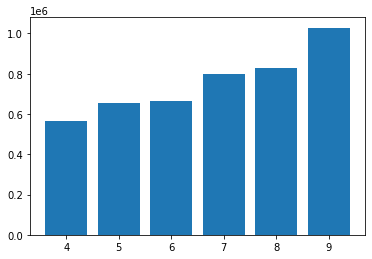

In [ ]:
plt.bar(list(result['Month'].value_counts().index), list(result['Month'].value_counts().values))

<BarContainer object of 7 artists>

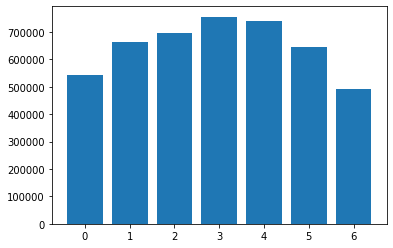

In [ ]:
plt.bar(list(result['DayOfTheWeek'].value_counts().index), list(result['DayOfTheWeek'].value_counts().values))

<BarContainer object of 24 artists>

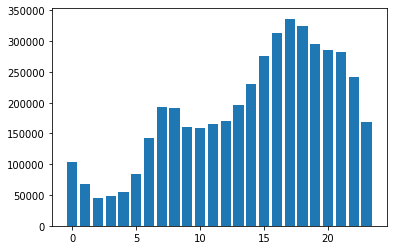

In [ ]:
plt.bar(list(result['Hour'].value_counts().index), list(result['Hour'].value_counts().values))

<BarContainer object of 31 artists>

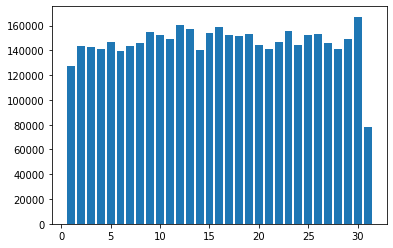

In [ ]:
plt.bar(list(result['OnlyDate'].value_counts().index), list(result['OnlyDate'].value_counts().values))

#Microtask 2

In [ ]:
result.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'Date', 'Month', 'DayOfTheWeek',
       'Hour', 'OnlyDate'],
      dtype='object')

In [ ]:
result.drop(['Lat', 'Lon'], axis = 1, inplace = True)

In [ ]:
result.head()

,Date/Time,Base,Date,Month,DayOfTheWeek,Hour,OnlyDate
0,4/1/2014 0:11:00,B02512,2014-04-01,4,1,0,1
1,4/1/2014 0:17:00,B02512,2014-04-01,4,1,0,1
2,4/1/2014 0:21:00,B02512,2014-04-01,4,1,0,1
3,4/1/2014 0:28:00,B02512,2014-04-01,4,1,0,1
4,4/1/2014 0:33:00,B02512,2014-04-01,4,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
group1 = result.groupby(['Date']).count()
time_series_train, time_series_test = train_test_split(group1, test_size = 0.1)
time_series_train.head()

,Date/Time,Base,Month,DayOfTheWeek,Hour,OnlyDate
Date,,,,,,
2014-06-03,22674,22674,22674,22674,22674,22674
2014-06-02,17503,17503,17503,17503,17503,17503
2014-09-18,40274,40274,40274,40274,40274,40274
2014-08-20,27955,27955,27955,27955,27955,27955
2014-08-29,27424,27424,27424,27424,27424,27424


In [ ]:
group2 = result.groupby('Date/Time').count()
ann_train, ann_test = train_test_split(group2, test_size = 0.1)
ann_train.head()
group2.shape

(260093, 6)

#Microtask 3

In [ ]:
!pip install --upgrade statsmodels==0.12.0

     |████████████████████████████████| 9.5MB 6.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
import numpy as np

In [ ]:
group1.columns

Index(['Date/Time', 'Base', 'Month', 'DayOfTheWeek', 'Hour', 'OnlyDate'], dtype='object')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


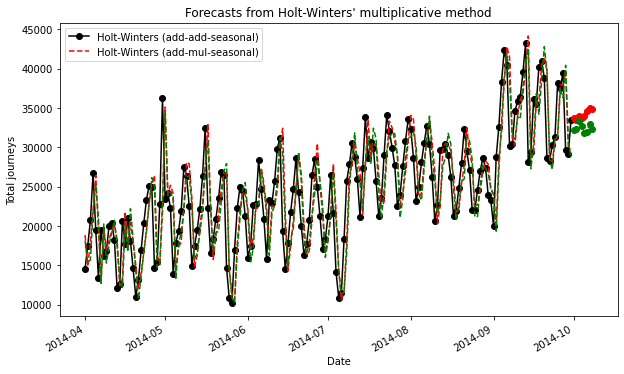

,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,9.489397e-01,9.320055e-01,9.311231e-01,9.242855e-01
$\beta$,3.152117e-03,1.807612e-03,2.719668e-04,1.004841e-04
$\phi$,NaN,NaN,9.723930e-01,9.900000e-01
$\gamma$,4.013929e-02,6.106162e-02,6.471015e-02,7.571450e-02
$l_0$,6.784712e+02,6.506978e+02,6.803348e+02,7.022318e+02
$b_0$,5.738275e+00,-2.718059e+00,2.213361e+00,-7.241882e+00
SSE,4.352943e+09,4.110917e+09,4.141766e+09,4.246528e+09


In [ ]:
aust = group1['Base']
fit1 = ExponentialSmoothing(aust, seasonal_periods=6, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()
fit2 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()
fit3 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add', damped_trend=True, use_boxcox=True, initialization_method="estimated").fit()
fit4 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul', damped_trend=True, use_boxcox=True, initialization_method="estimated").fit()
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'smoothing_seasonal', 'initial_level', 'initial_trend']
results["Additive"]       = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"]   = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

ax = aust.plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Holt-Winters' multiplicative method" )
ax.set_ylabel("Total journeys")
ax.set_xlabel("months")
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit2.fittedvalues.plot(ax=ax, style='--', color='green')

fit1.forecast(8).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
fit2.forecast(8).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)

plt.show()

results

#MicroTask4

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be use

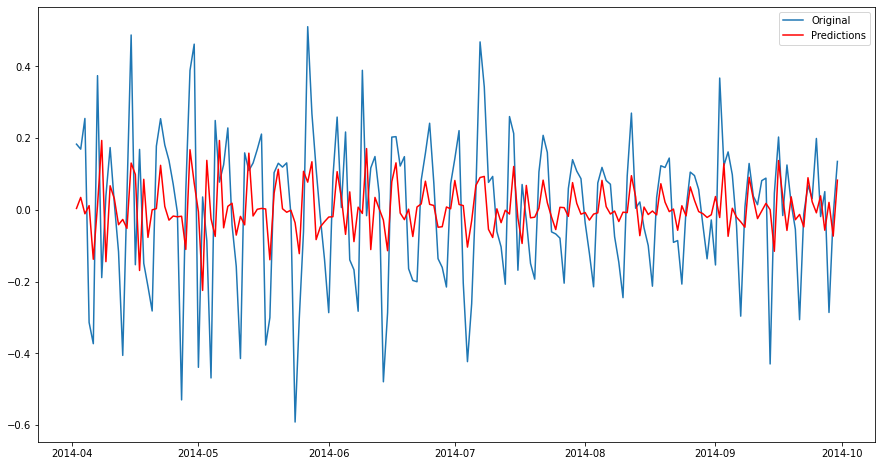

In [ ]:
Train_log = np.log(group1['Date/Time'])
valid_log = np.log(group1['Date/Time'])
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize = (15,8))
model = ARIMA(Train_log, order = (2,1,0))
results_AR = model.fit(disp=-1)
train_log_diff = Train_log - Train_log.shift(1)
plt.plot(train_log_diff.dropna(), label = "Original")
plt.plot(results_AR.fittedvalues, color = 'red', label = 'Predictions')
plt.legend(loc = 'best')

#MicroTask5

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [ ]:
uber_count = result.groupby(pd.Grouper(key='Date/Time')).count()
uber_count= uber_count.drop(columns = ['OnlyDate', 'Base', 'Month', 'DayOfTheWeek', 'Hour'])
print(uber_count.info())
uber_count.head()

<class 'pandas.core.frame.DataFrame'>
Index: 260093 entries, 4/1/2014 0:11:00 to 9/30/2014 3:26:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Date    260093 non-null  int64
dtypes: int64(1)
memory usage: 4.0+ MB
None


,Date
Date/Time,
4/1/2014 0:11:00,6
4/1/2014 0:17:00,3
4/1/2014 0:21:00,5
4/1/2014 0:28:00,3
4/1/2014 0:33:00,5


In [ ]:
train = uber_count[:][:234083]
test = uber_count[:][234084:]
test.head()

,Date
Date/Time,
9/24/2014 9:59:00,19
9/24/2014 10:00:00,15
9/24/2014 10:04:00,10
9/24/2014 10:05:00,17
9/24/2014 10:06:00,16


In [ ]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [ ]:

model = Sequential()
model.add(Dense(9, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/10
234082/234082 [==============================] - 349s 1ms/step - loss: 0.0024 - accuracy: 0.0284
Epoch 2/10
234082/234082 [==============================] - 342s 1ms/step - loss: 0.0025 - accuracy: 0.0284
Epoch 3/10
234082/234082 [==============================] - 343s 1ms/step - loss: 0.0025 - accuracy: 0.0284
Epoch 4/10
234082/234082 [==============================] - 338s 1ms/step - loss: 0.0025 - accuracy: 0.0284
Epoch 5/10
234082/234082 [==============================] - 337s 1ms/step - loss: 0.0025 - accuracy: 0.0284
Epoch 6/10
234082/234082 [==============================] - 338s 1ms/step - loss: 0.0025 - accuracy: 0.0284
Epoch 00006: early stopping
